In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
save_dir = '/home/h02/smoreton/Documents/VALNA/FIGURES/'

obs_dir = '/data/users/smoreton/Obs/NA_overflows/'

In [3]:
obs_name = 'latrabjarg_clim'
obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc') 
latra_obs_lat = obs_ds.latitude.values
latra_obs_lon = obs_ds.longitude.values


obs_name = 'hansen'
obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc') 
han_obs_lat = obs_ds.latitude.values
han_obs_lon = obs_ds.longitude.values


obs_name = 'eel'
obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc') 
eel_obs_lat = obs_ds.latitude.values
eel_obs_lon = obs_ds.longitude.values


obs_name = 'kogur'
obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc') 
kog_obs_lat = obs_ds.latitude.values
kog_obs_lon = obs_ds.longitude.values


In [32]:
 obs_name = 'ovide' # Icelandic basin only
obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc')
obs_ds = obs_ds.isel(station=slice(99, 214))
ovide_obs_lat = obs_ds.latitude.values
ovide_obs_lon = obs_ds.longitude.values

In [36]:

obs_name = 'osnap' 
obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc')
obs_ds = obs_ds.isel(station=slice(76, 205)) # Irminger and Icelandic basins,  
osnap_obs_lat = obs_ds.latitude.values
osnap_obs_lon = obs_ds.longitude.values

obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc')
obs_irm_ds = obs_ds.isel(station=slice(76, 143)) #Irminger basin only
osnap_obs_irm_lat = obs_irm_ds.latitude.values
osnap_obs_irm_lon = obs_irm_ds.longitude.values

obs_ds = xr.open_mfdataset(obs_dir+obs_name+'_Xsection.nc')
obs_ice_ds = obs_ds.isel(station=slice(143, 205)) #Icelandic basin only
osnap_obs_ice_lat = obs_ice_ds.latitude.values
osnap_obs_ice_lon = obs_ice_ds.longitude.values

/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


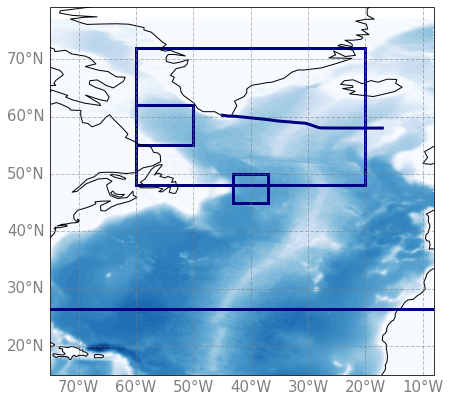

In [34]:
# regions to mark
labsea = patches.Rectangle((-60, 55), 10, 7, linewidth=3, edgecolor='navy', facecolor='none')
newf = patches.Rectangle((-43, 45), 6, 5, linewidth=3, edgecolor='navy', facecolor='none')
subpg = patches.Rectangle((-60, 48), 40, 24, linewidth=3, edgecolor='navy', facecolor='none')


MSKPATH='/home/h02/smoreton/Documents/MESH_MASK/'
ds = xr.open_dataset(MSKPATH+'bathymetry_eORCA025-GO6.nc')
    
#cropping to NA

min_lon = -75.
max_lon = -8.

min_lat = 15.
max_lat = 77.

mask_lon = (ds.nav_lon >= min_lon) & (ds.nav_lon <= max_lon)
mask_lat = (ds.nav_lat >= min_lat) & (ds.nav_lat <= max_lat)

ds_NA = ds.where(mask_lon & mask_lat, drop=True)

fig = plt.figure(figsize=np.array([175, 175]) / 25.4)

ax = plt.axes(projection=ccrs.PlateCarree())
#fig.tight_layout()

# adding osnap obs in Irminger & Icelandic basins:
ax.plot(osnap_obs_lon, osnap_obs_lat, transform=ccrs.PlateCarree(), 
        linewidth=3, c='navy')#, linestyle=':')

p = ax.contourf(ds_NA.nav_lon.values, ds_NA.nav_lat.values, ds_NA.Bathymetry.values, 60,
             transform=ccrs.PlateCarree(), cmap='Blues', extend='both')

ax.coastlines()
ax.set_extent([-75, -8, 15, 77])

ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

ax.add_patch(labsea)
ax.add_patch(newf)
ax.add_patch(subpg)

ax.axhline(26.5, c='navy', linewidth=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir + 'box_NA.png', dpi=200)

/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


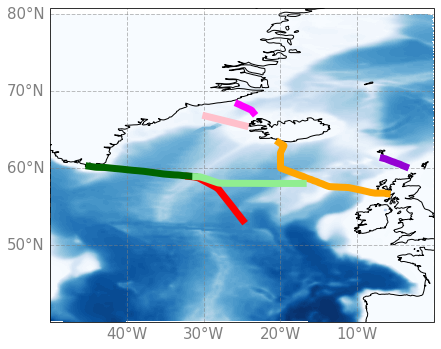

In [35]:
# overflow obs only, latrabjarg_clim, ovide, eel, kogur, hansen & osnap

MSKPATH='/home/h02/smoreton/Documents/MESH_MASK/'
ds = xr.open_dataset(MSKPATH+'bathymetry_eORCA025-GO6.nc')
    
#cropping to NA

min_lon = -50.
max_lon = 0.

min_lat = 40.
max_lat = 80.

mask_lon = (ds.nav_lon >= min_lon) & (ds.nav_lon <= max_lon)
mask_lat = (ds.nav_lat >= min_lat) & (ds.nav_lat <= max_lat)

ds_NA = ds.where(mask_lon & mask_lat, drop=True)

fig = plt.figure(figsize=np.array([175, 175]) / 25.4)

ax = plt.axes(projection=ccrs.PlateCarree())
#fig.tight_layout()

# adding overflow obs: 
ax.plot(latra_obs_lon, latra_obs_lat, transform=ccrs.PlateCarree(), linewidth=7, c='pink')
ax.plot(eel_obs_lon, eel_obs_lat, transform=ccrs.PlateCarree(), linewidth=7, c='orange')
ax.plot(han_obs_lon, han_obs_lat, transform=ccrs.PlateCarree(), linewidth=7, c='darkviolet')
ax.plot(kog_obs_lon, kog_obs_lat, transform=ccrs.PlateCarree(), linewidth=7, c='fuchsia')
ax.plot(ovide_obs_lon, ovide_obs_lat, transform=ccrs.PlateCarree(),
         linewidth=7, c='red')

ax.plot(osnap_obs_irm_lon, osnap_obs_irm_lat, transform=ccrs.PlateCarree(), 
        linewidth=7, c='darkgreen')
ax.plot(osnap_obs_ice_lon, osnap_obs_ice_lat, transform=ccrs.PlateCarree(), 
        linewidth=7, c='lightgreen')

p = ax.contourf(ds_NA.nav_lon.values, ds_NA.nav_lat.values, ds_NA.Bathymetry.values, 60,
             transform=ccrs.PlateCarree(), cmap='Blues', extend='both')

ax.coastlines()
ax.set_extent([-50, 0, 40, 80])

ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir + 'box_NA_overflows.png', dpi=200)